In [1]:
import pandas as pd
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.shape)

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1                   All-Bran   K    C        70        4    1     260    9.0   
2  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
3         Cracklin'_Oat_Bran   K    C       110        3    3     140    4.0   
4      Post_Nat._Raisin_Bran   P    C       120        3    1     200    6.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3    1.00  0.33  68.402973  
1    7.0       5     320        25      3    1.00  0.33  59.425505  
2    8.0       0     330        25      3    1.00  0.50  93.704912  
3   10.0       7     160        25      3    1.00  0.50  40.448772  
4   11.0      14     260        25      3    1.33  0.67  37.840594  
(74, 16)


In [2]:
import numpy as np
diabetes_data_copy = df.copy(deep = True)

# split data table into data X and class labels y
X = df.iloc[:,3:12].values
y = df.iloc[:,-1].values

In [3]:
# abobe Glucose,Insulin may be good
df2 = df.iloc[:,3:12]
df2.keys()

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins'],
      dtype='object')

In [6]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d2 = scaler.fit_transform(X)
#fit_transform


In [7]:
#from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=5)  # 8 components and check with 2
Y_sklearn = sklearn_pca.fit_transform(d2)

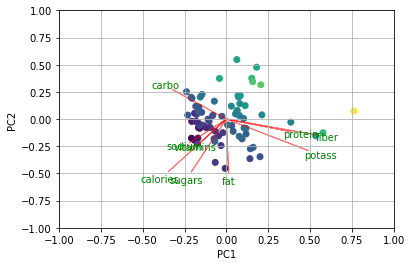

In [8]:
## biplot
import numpy as np
import matplotlib.pyplot as plt
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(Y_sklearn[:,0:2],np.transpose(sklearn_pca.components_[0:2, :]), 
       labels=['calories',  'protein',  'fat',  'sodium',  'fiber', 'carbo',  'sugars',  'potass',  'vitamins' ])                 
                                                           

plt.show()


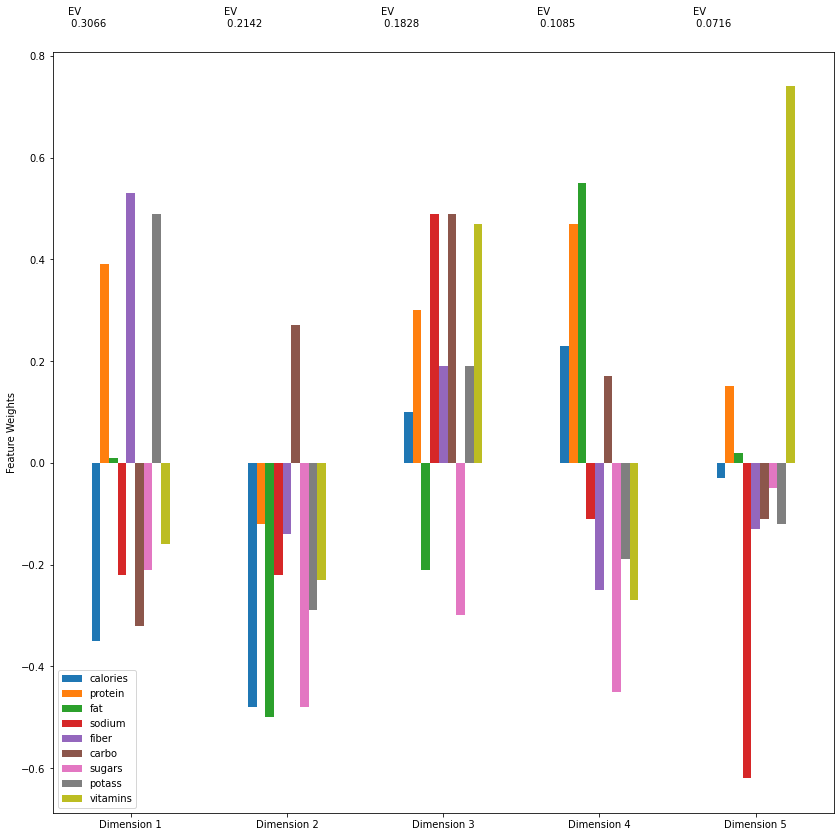

In [10]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 2), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 2), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

   
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,14))
    

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    # Explained Variance = EV
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "EV\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

#
pca_results = pca_results(df2 ,sklearn_pca)


In [11]:
pca_results.cumsum()

,Explained Variance,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
Dimension 1,0.31,-0.35,0.39,0.01,-0.22,0.53,-0.32,-0.21,0.49,-0.16
Dimension 2,0.52,-0.83,0.27,-0.49,-0.44,0.39,-0.05,-0.69,0.20,-0.39
Dimension 3,0.70,-0.73,0.57,-0.70,0.05,0.58,0.44,-0.99,0.39,0.08
Dimension 4,0.81,-0.50,1.04,-0.15,-0.06,0.33,0.61,-1.44,0.20,-0.19
Dimension 5,0.88,-0.53,1.19,-0.13,-0.68,0.20,0.50,-1.49,0.08,0.55


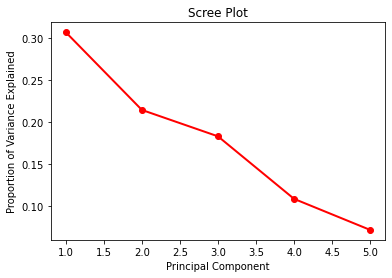

In [12]:
# scree plot - Like Elbow
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#pca = sklearnPCA(n_components=2)
PC_values = np.arange(sklearn_pca.n_components_) + 1

# explained_variance_ratio = EVR
plt.plot(PC_values, sklearn_pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()